# Project-7:Big Data Mart Sales Problem

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: This file for the model building purpose. 

- bigdatamart_Test.csv: this file for getting predictions from the trained model. 

# Importing all the necessary Libraries:

In [49]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading the Data Set:

In [50]:
df=pd.read_csv('bigdatamart_Train.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [51]:
df.dtypes   #checking the type of the data.

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [52]:
df.isnull().sum() # Checking the total null value columns 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [53]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())#filling the null values


In [54]:
df.isnull().sum() # Checking the total null value columns 

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Encoding:

In [55]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()



In [56]:
df['Outlet_Size']=lab_enc.fit_transform(df['Outlet_Size'])
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode())#fillig the null values

In [57]:
df.isnull().sum() # Checking the total null value columns 

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Describing data:

In [58]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,1.736360,2181.288914
std,4.226124,0.051598,62.275067,8.371760,0.989181,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,0.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,1.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,2.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,3.000000,13086.964800


# Encoding the data:

In [59]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=ord_enc.fit_transform(df[i].values.reshape(-1,1))


In [60]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,1.0,0.016047,4.0,249.8092,9.0,1999,1,0.0,1.0,3735.1380
1,8.0,5.920,2.0,0.019278,14.0,48.2692,3.0,2009,1,2.0,2.0,443.4228
2,662.0,17.500,1.0,0.016760,10.0,141.6180,9.0,1999,1,0.0,1.0,2097.2700
3,1121.0,19.200,2.0,0.000000,6.0,182.0950,0.0,1998,3,2.0,0.0,732.3800
4,1297.0,8.930,1.0,0.000000,9.0,53.8614,1.0,1987,0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,1.0,0.056783,13.0,214.5218,1.0,1987,0,2.0,1.0,2778.3834
8519,897.0,8.380,2.0,0.046982,0.0,108.1570,7.0,2002,3,1.0,1.0,549.2850
8520,1357.0,10.600,1.0,0.035186,8.0,85.1224,6.0,2004,2,1.0,1.0,1193.1136
8521,681.0,7.210,2.0,0.145221,13.0,103.1332,3.0,2009,1,2.0,2.0,1845.5976


# Correlation using Heat Map:

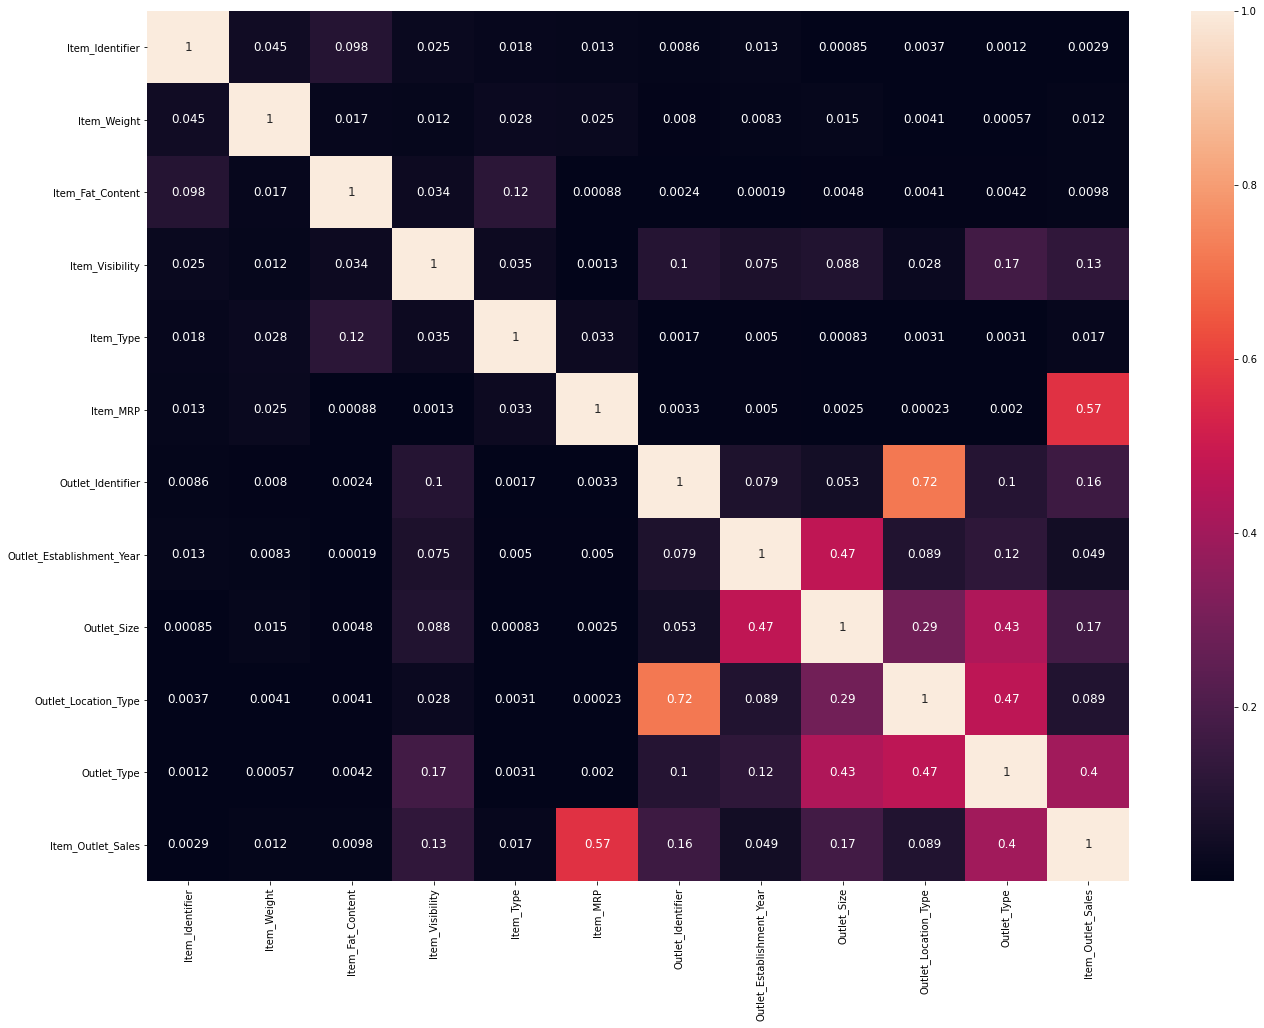

In [61]:
df_corr=df.corr().abs()

plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12})
plt.show()  

In [62]:
corr=df.corr()
corr['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Outlet_Type                  0.401522
Outlet_Identifier            0.162325
Outlet_Location_Type         0.089367
Item_Type                    0.017048
Item_Weight                  0.011550
Item_Fat_Content             0.009800
Item_Identifier              0.002869
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Outlet_Size                 -0.172477
Name: Item_Outlet_Sales, dtype: float64

# Correlation of Item_Outlet_Sales variable with all the other feature variables in the data set:

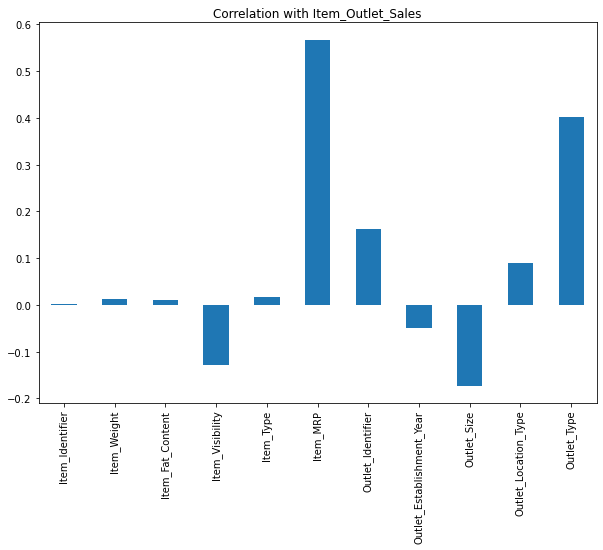

In [63]:
df.drop('Item_Outlet_Sales',axis=1).corrwith(df.Item_Outlet_Sales).plot(kind='bar',grid=False,figsize=(10,7),title='Correlation with Item_Outlet_Sales')
plt.show()

# Skewness:

In [64]:
df.skew()

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.131895
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

# Checking outliers:

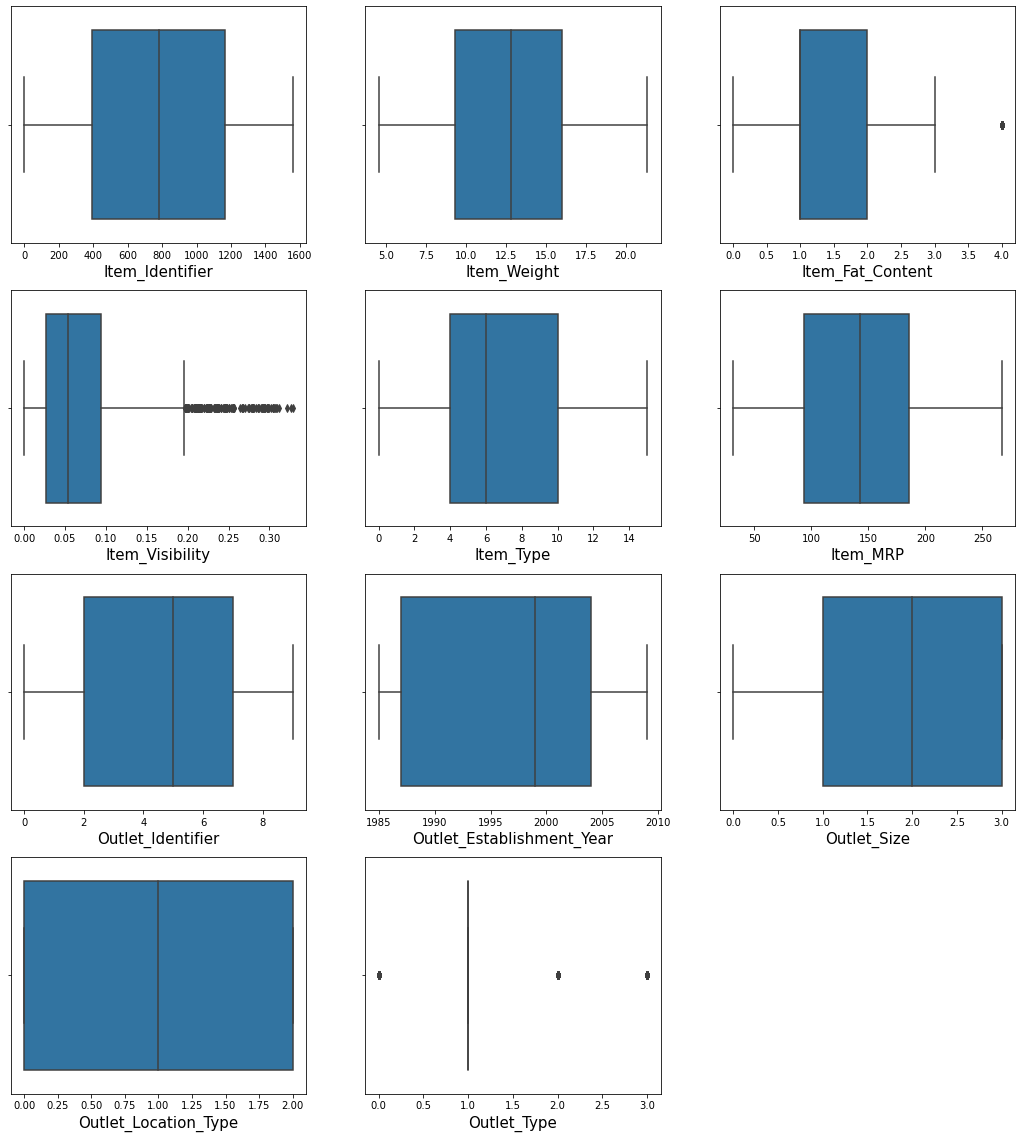

In [65]:
x=df.drop(columns=['Item_Outlet_Sales'])
plt.figure(figsize=(18,20))
graph=1
for column in x:
    if graph<=12:
        ax=plt.subplot(4,3,graph)
        sns.boxplot(x[column],orient='v')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()  

# dropping the columns which has high skewness and outliers:

In [66]:
df=df.drop(columns='Item_Visibility')

# Removing outliers using zscore:

In [67]:
from scipy.stats import zscore
import numpy as np
zsc=zscore(df)
abs_z_score=np.abs(zsc)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df[filtering_entry]
df.shape

(8317, 11)

# Loss Percentile:

In [68]:
loss_percent=(6113-5973)/6113*100
loss_percent

2.2902012105349256

# Splitting the feature and label variable:

In [69]:
y=df['Item_Outlet_Sales']
x=df.drop(columns=['Item_Outlet_Sales'])

In [70]:
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)#scaling the feature variables.

# Modelling:

In [71]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [72]:
lr=LinearRegression()
lr.fit(x_scaled,y)

LinearRegression()

# Ensemble Approach:

In [73]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(criterion='mae',max_features='sqrt')
rf.fit(x_scaled,y)


RandomForestRegressor(criterion='mae', max_features='sqrt')

# Getting the testing data:

In [77]:
df1=pd.read_csv('bigdatamart_Test.csv')
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [78]:
df1.isnull().sum()# checking the null values

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [79]:
# Cleaning all the null values by filling using other methods:
df1['Item_Weight']=df1['Item_Weight'].fillna(df1['Item_Weight'].mean())
df1=df1.dropna()

# Encoding data:

In [80]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

df1['Outlet_Size']=lab_enc.fit_transform(df1['Outlet_Size'])
df1['Outlet_Size']=df1['Outlet_Size'].fillna(df1['Outlet_Size'].mode())

In [81]:
df1.isnull().sum()# checking the null values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [82]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder()
df1
for i in df1.columns:
    if df1[i].dtypes=="object":
        df1[i]=ord_enc.fit_transform(df1[i].values.reshape(-1,1))
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1071.0,20.750000,1.0,0.007565,13.0,107.8622,6.0,1999,1,0.0,1.0
4,1151.0,12.695633,2.0,0.118599,4.0,234.2300,3.0,1985,1,2.0,3.0
5,448.0,9.800000,2.0,0.063817,6.0,117.1492,5.0,1997,2,0.0,1.0
6,588.0,19.350000,2.0,0.082602,0.0,50.1034,1.0,2009,1,2.0,2.0
7,257.0,12.695633,1.0,0.015782,0.0,81.0592,3.0,1985,1,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
5673,370.0,7.070000,1.0,0.094053,13.0,116.0834,1.0,2009,1,2.0,2.0
5674,109.0,15.700000,1.0,0.030704,7.0,43.2770,5.0,1997,2,0.0,1.0
5675,1062.0,13.000000,2.0,0.070411,13.0,63.4484,6.0,1999,1,0.0,1.0
5676,223.0,10.500000,2.0,0.013496,13.0,141.3154,5.0,1997,2,0.0,1.0


In [83]:
df2=df1.drop(columns='Item_Visibility')# dropping the unwanted columns

In [84]:
df1.isnull().sum()# checking the null values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [85]:
x1=df2

In [86]:
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()
x1=scalar.fit_transform(x1)#scaling the data

In [87]:
len(x1)

4075

# Predictng the Item_Outlet_Sales using the previous modelling method

In [88]:
y1=rf.predict(x1)
len(y1)

4075

# Splitting the x and y using train test split:

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=48)

# Testing the model using df dataset:

In [55]:
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [56]:
pred_test=lr.predict(x_test)
r2_score(y_test,pred_test)

0.46822315751938126

# Regularisation and HyperParameter Tuning:


In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters={'alpha':[0.0001,.001,.01,.1,1,10], 'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


# Lasso Regression :

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso


ls=Lasso()

csv=cross_val_score(ls,x_scaled,y,cv=6)
cv_mean=csv.mean()
cv_mean

0.543140281353602

In [42]:
ls=Lasso(alpha=0.1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss


0.5341631547237147

# Using Ensemble Approach:

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


parameters={'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt', 'log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [43]:
rf=RandomForestRegressor(criterion='mae',max_features='sqrt')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf=rf.predict(x_test)

rfs=r2_score(y_test,pred_rf)
print('R2 Score: ',rfs*100)

from sklearn.model_selection import cross_val_score

rfcsv=cross_val_score(rf,x_scaled,y,cv=2)
rf_cv_mean=rfcsv.mean()
print('Cross validation Score: ',rf_cv_mean*100)

R2 Score:  53.09577159110441
Cross validation Score:  54.666870951241606


# Creating the df1 data set with Item_Outlet_Sales output.

In [90]:
import numpy as np
predicted=np.array(y1)
y11=pd.DataFrame({'Item_Outlet_Sales':y1})
df1=df1.join(y11)
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1071.0,20.750000,1.0,0.007565,13.0,107.8622,6.0,1999,1,0.0,1.0,1710.476819
4,1151.0,12.695633,2.0,0.118599,4.0,234.2300,3.0,1985,1,2.0,3.0,1692.729920
5,448.0,9.800000,2.0,0.063817,6.0,117.1492,5.0,1997,2,0.0,1.0,769.721393
6,588.0,19.350000,2.0,0.082602,0.0,50.1034,1.0,2009,1,2.0,2.0,2206.055062
7,257.0,12.695633,1.0,0.015782,0.0,81.0592,3.0,1985,1,2.0,3.0,519.473805
...,...,...,...,...,...,...,...,...,...,...,...,...
5673,370.0,7.070000,1.0,0.094053,13.0,116.0834,1.0,2009,1,2.0,2.0,NaN
5674,109.0,15.700000,1.0,0.030704,7.0,43.2770,5.0,1997,2,0.0,1.0,NaN
5675,1062.0,13.000000,2.0,0.070411,13.0,63.4484,6.0,1999,1,0.0,1.0,NaN
5676,223.0,10.500000,2.0,0.013496,13.0,141.3154,5.0,1997,2,0.0,1.0,NaN


In [91]:
df1['Item_Outlet_Sales']=df1['Item_Outlet_Sales'].fillna(0)

In [92]:
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1071.0,20.750000,1.0,0.007565,13.0,107.8622,6.0,1999,1,0.0,1.0,1710.476819
4,1151.0,12.695633,2.0,0.118599,4.0,234.2300,3.0,1985,1,2.0,3.0,1692.729920
5,448.0,9.800000,2.0,0.063817,6.0,117.1492,5.0,1997,2,0.0,1.0,769.721393
6,588.0,19.350000,2.0,0.082602,0.0,50.1034,1.0,2009,1,2.0,2.0,2206.055062
7,257.0,12.695633,1.0,0.015782,0.0,81.0592,3.0,1985,1,2.0,3.0,519.473805
...,...,...,...,...,...,...,...,...,...,...,...,...
5673,370.0,7.070000,1.0,0.094053,13.0,116.0834,1.0,2009,1,2.0,2.0,0.000000
5674,109.0,15.700000,1.0,0.030704,7.0,43.2770,5.0,1997,2,0.0,1.0,0.000000
5675,1062.0,13.000000,2.0,0.070411,13.0,63.4484,6.0,1999,1,0.0,1.0,0.000000
5676,223.0,10.500000,2.0,0.013496,13.0,141.3154,5.0,1997,2,0.0,1.0,0.000000
